In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix, roc_curve, classification_report)

In [23]:
df=pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [24]:
print(df.shape)
df.columns

(30000, 25)


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [26]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(0)

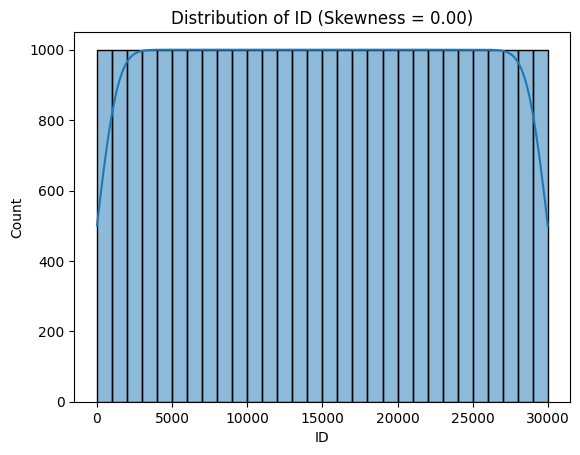

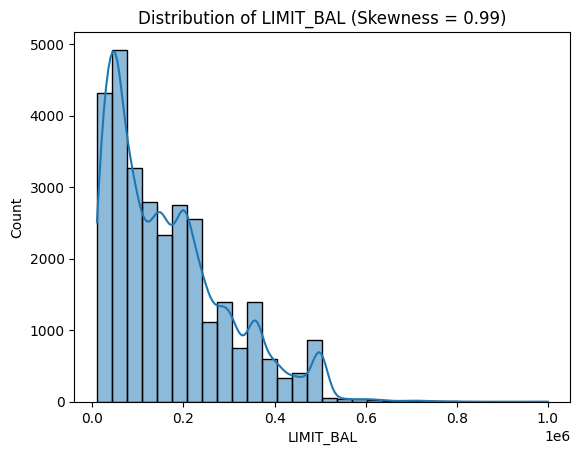

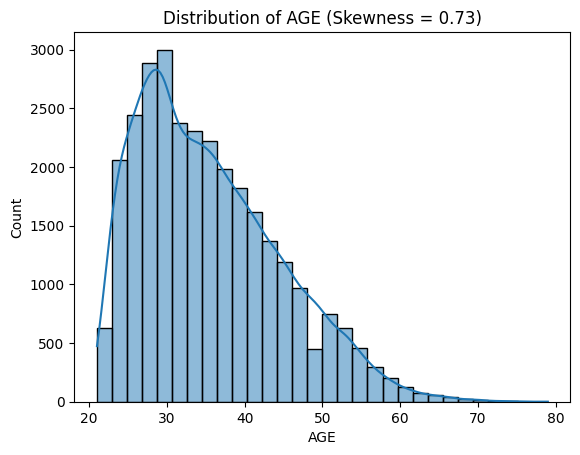

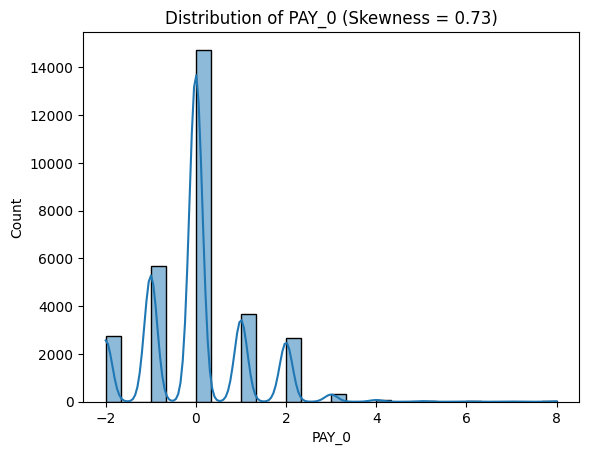

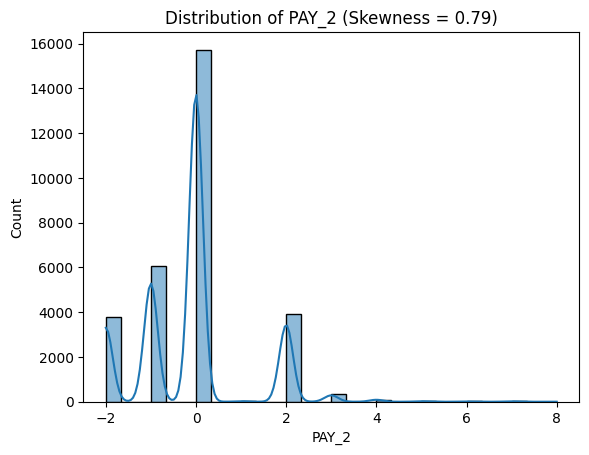

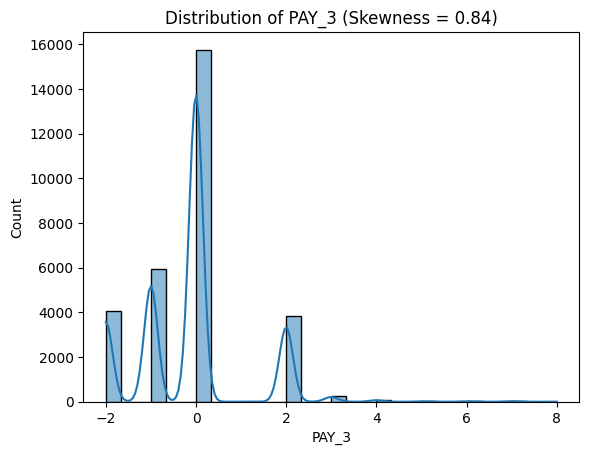

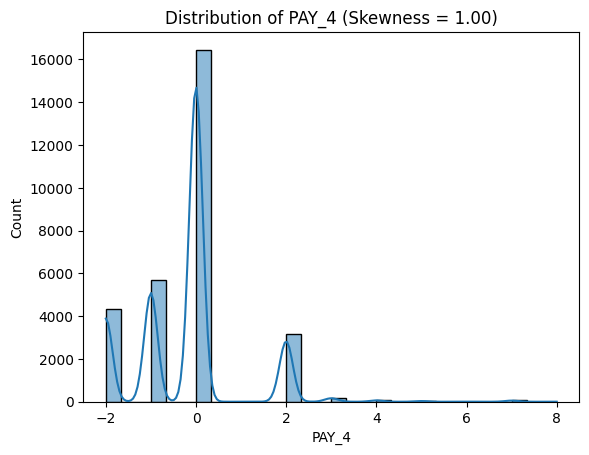

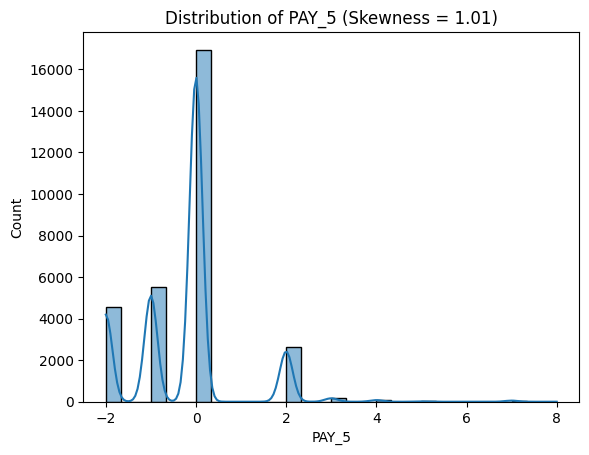

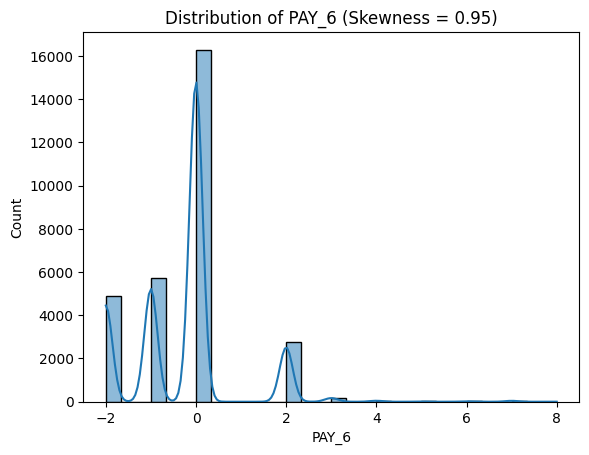

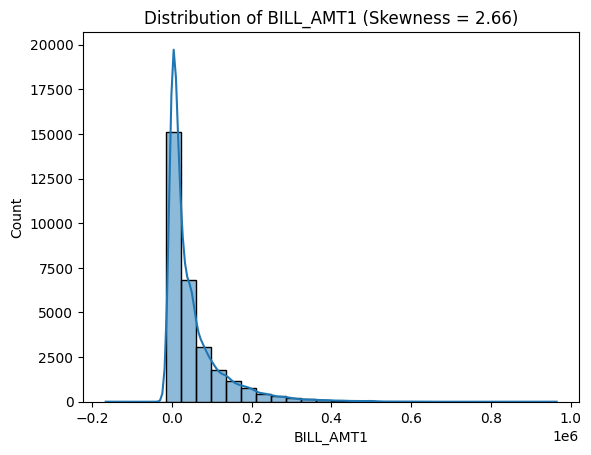

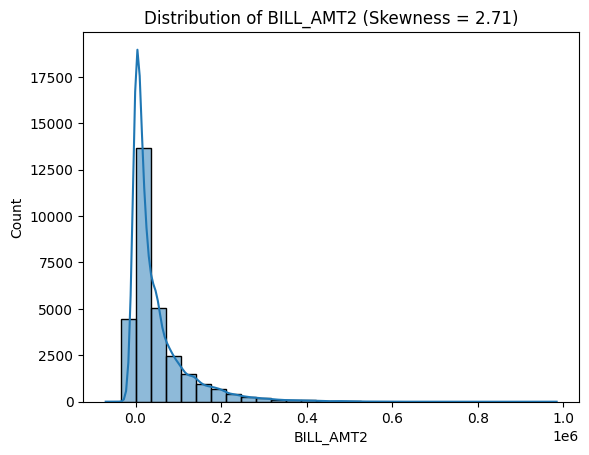

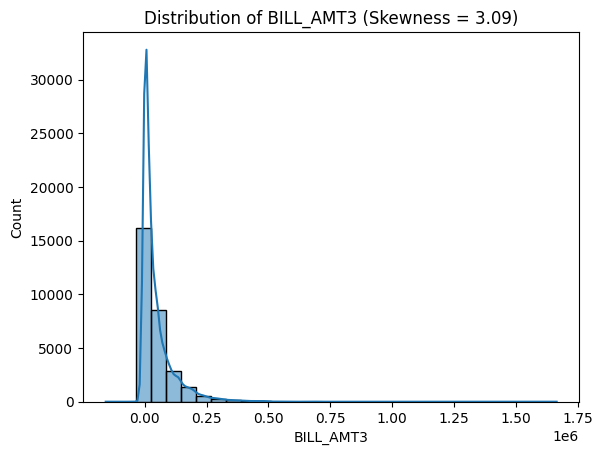

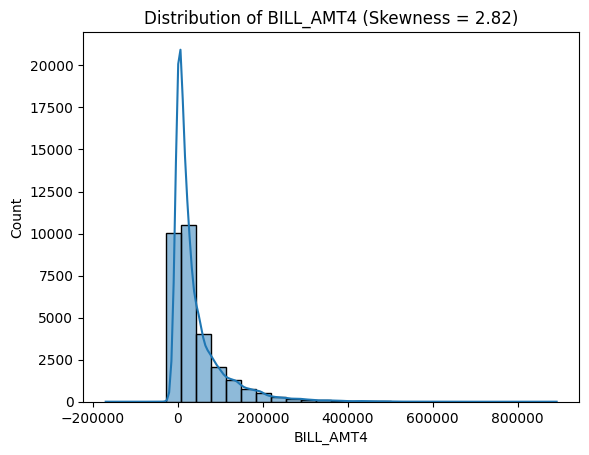

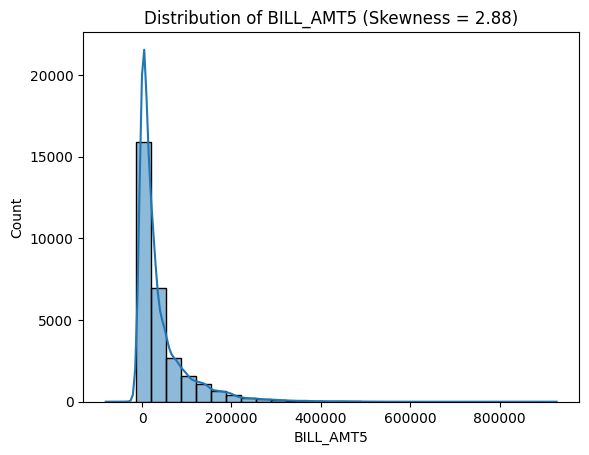

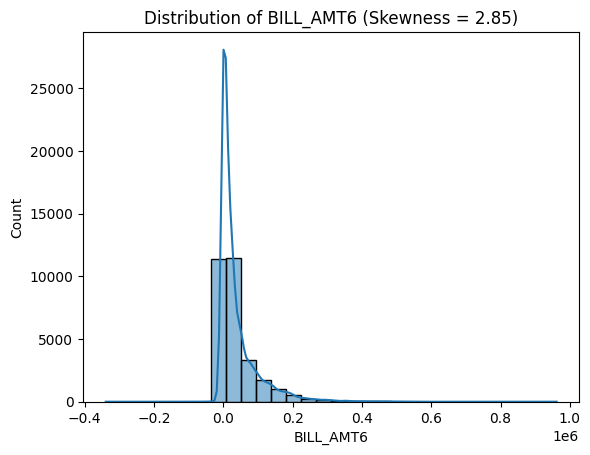

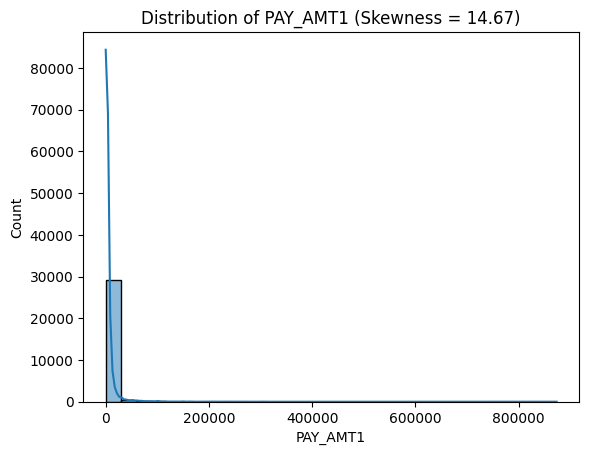

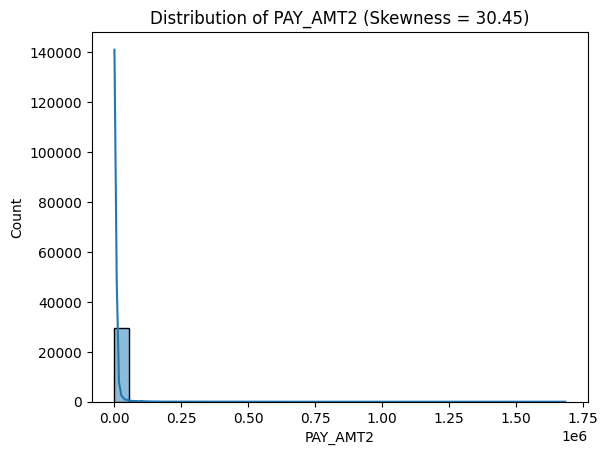

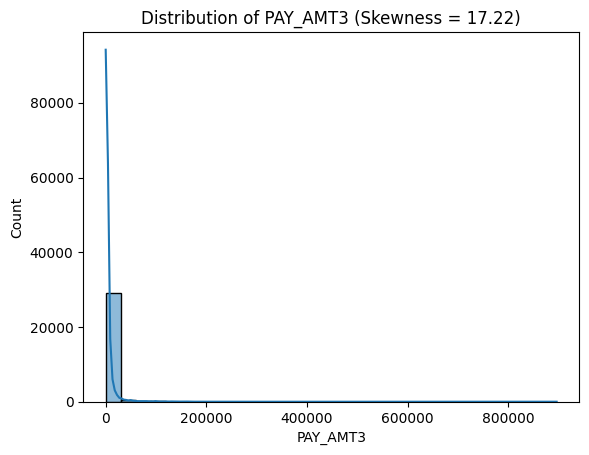

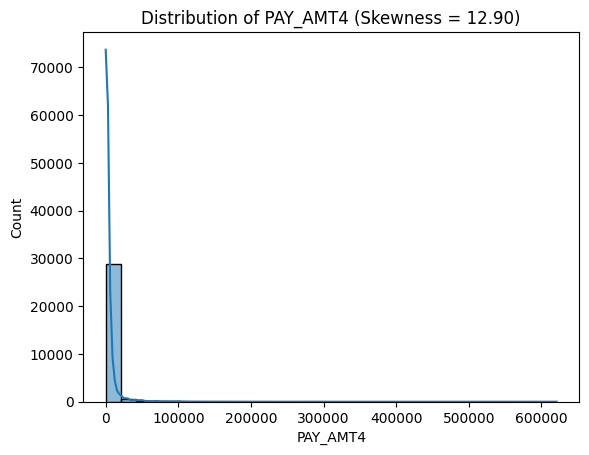

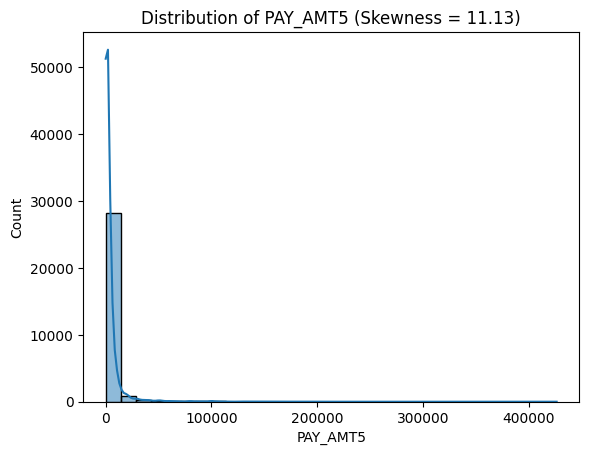

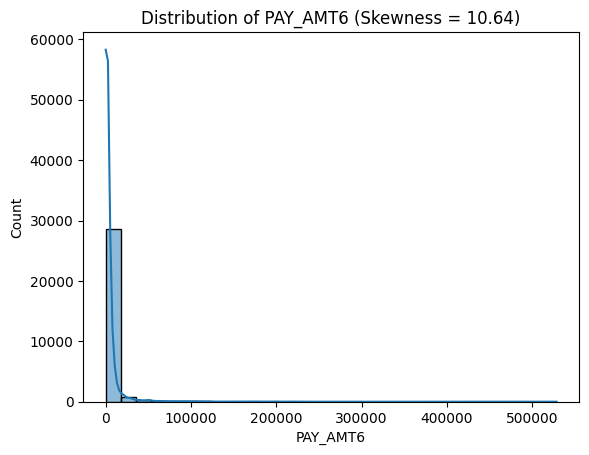

In [28]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col not in ['default.payment.next.month', 'SEX', 'EDUCATION', 'MARRIAGE']]
for col in num_cols:
    skew_val = df[col].skew()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (Skewness = {skew_val:.2f})")
    plt.show()


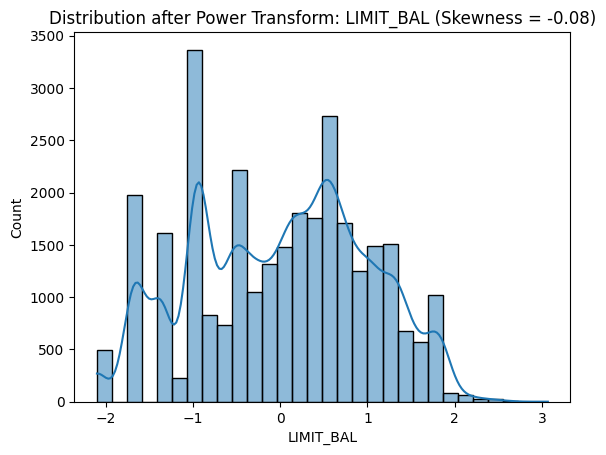

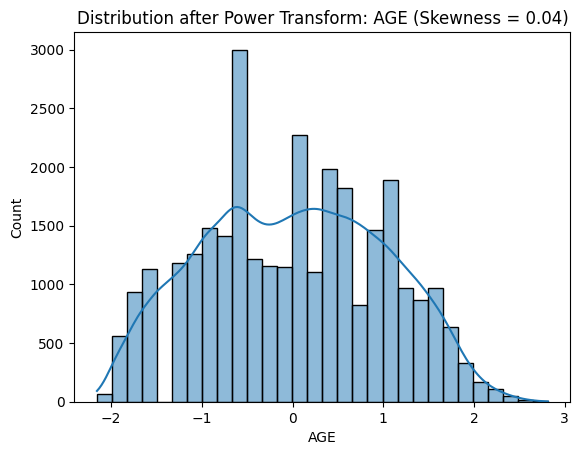

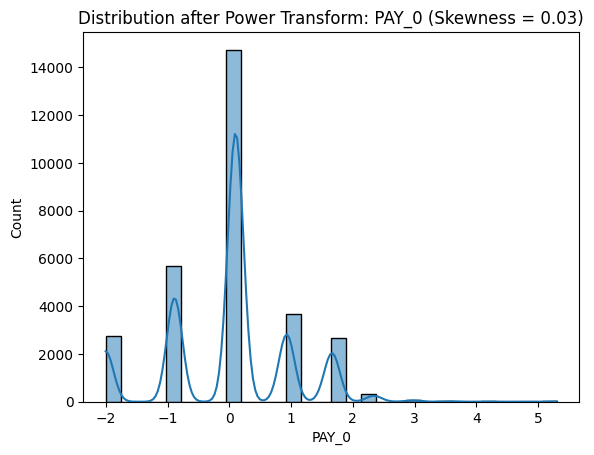

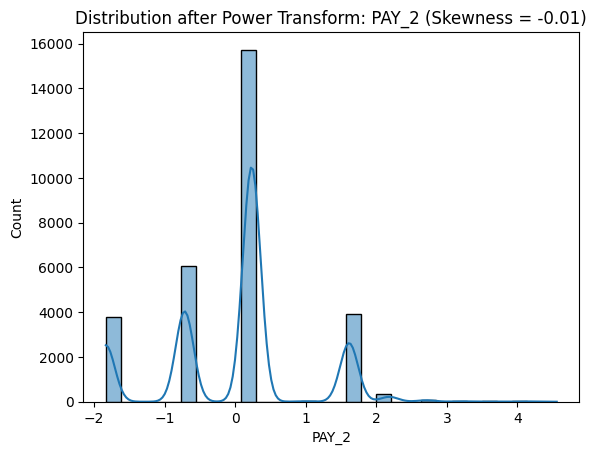

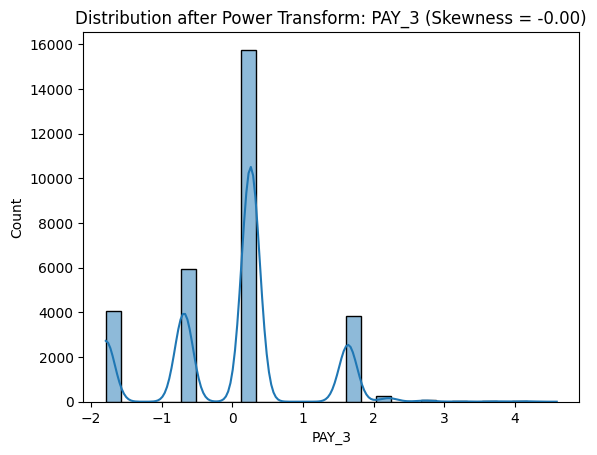

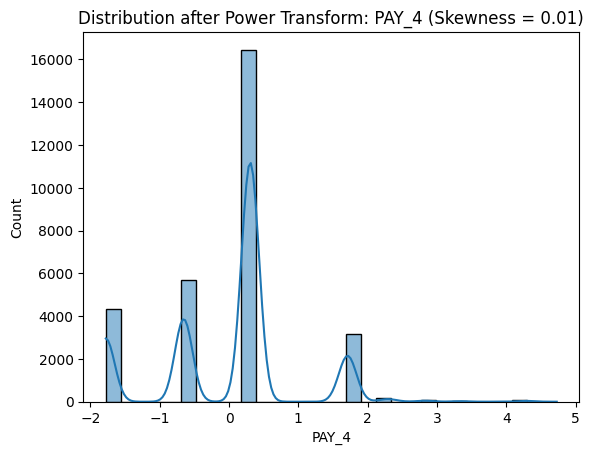

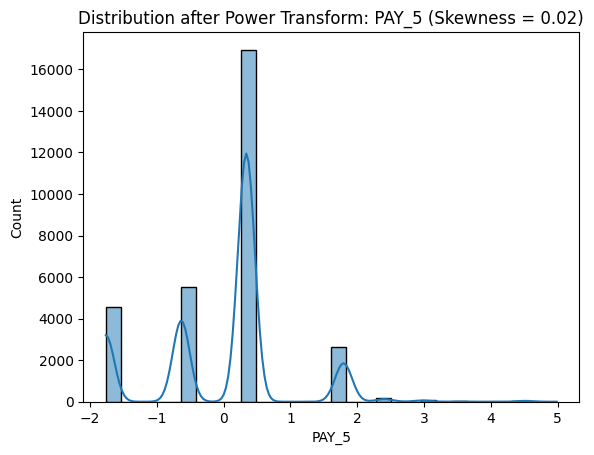

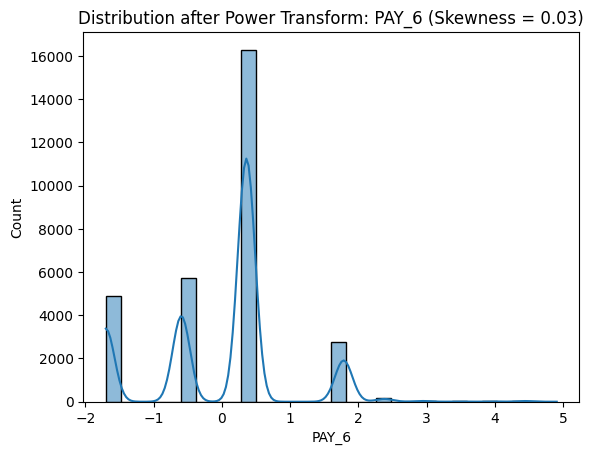

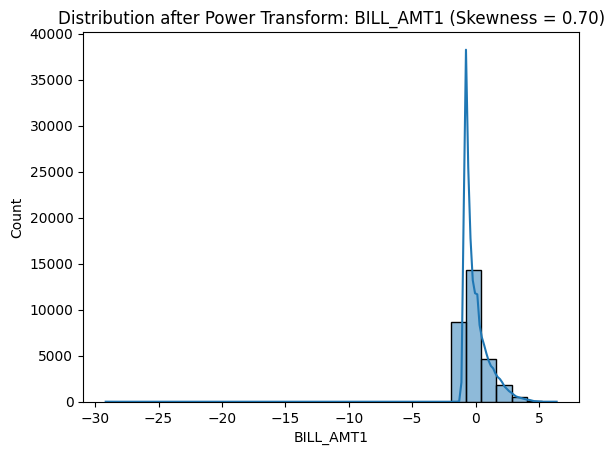

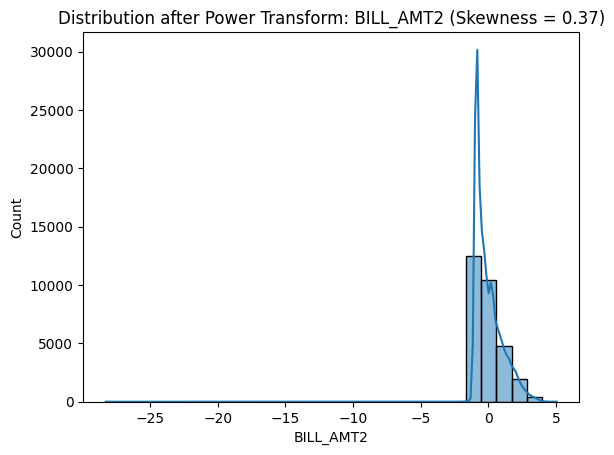

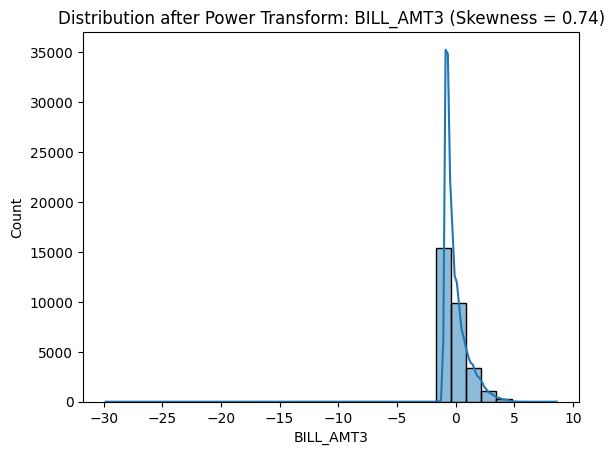

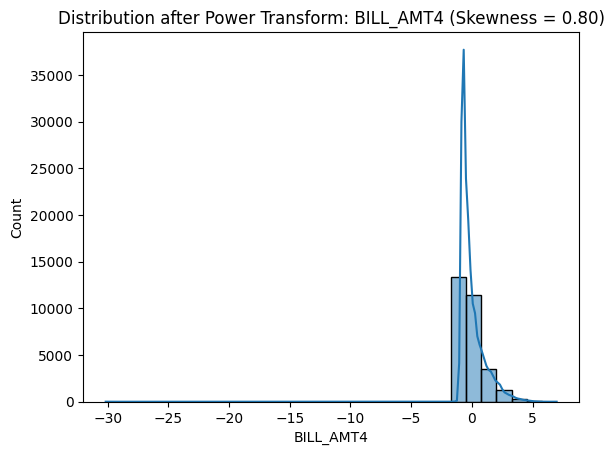

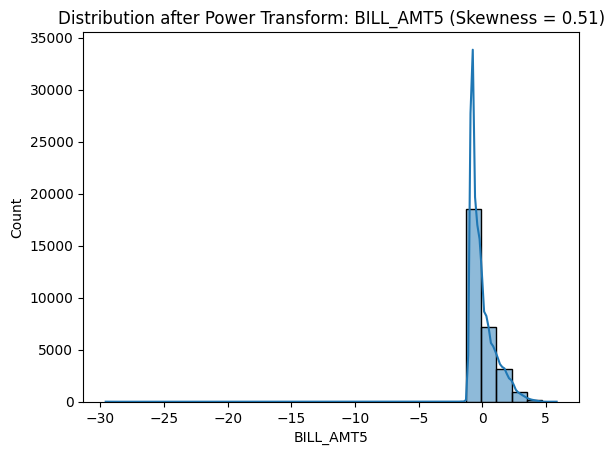

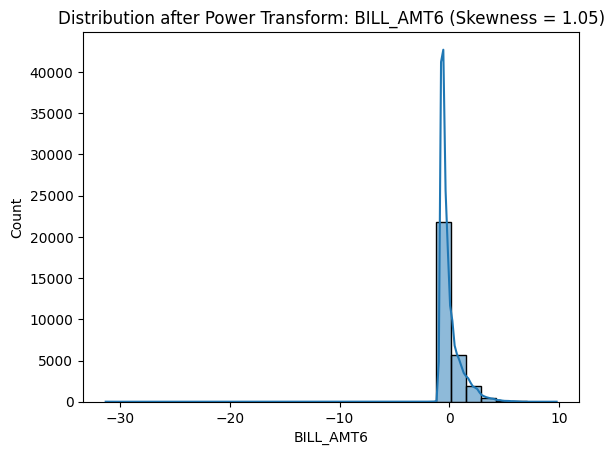

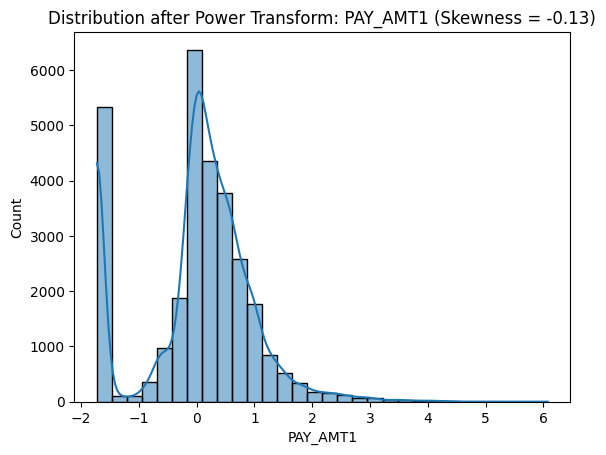

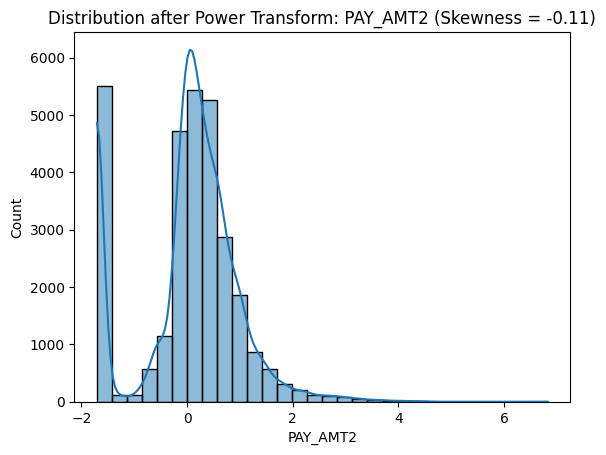

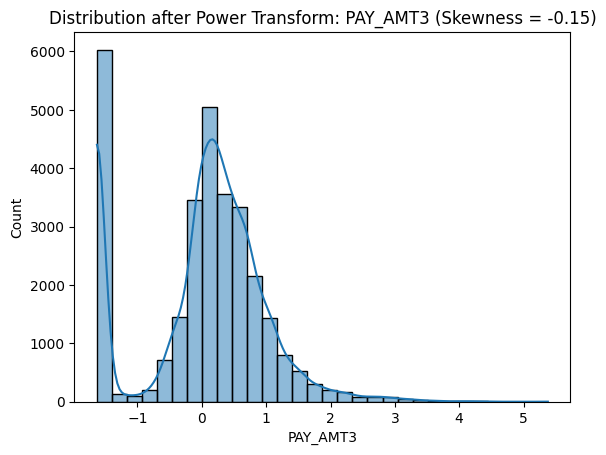

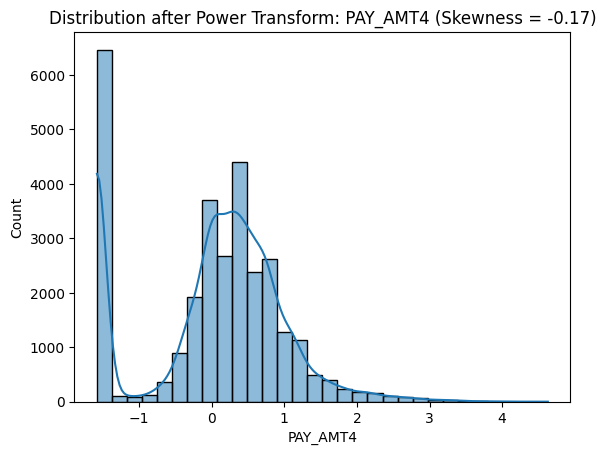

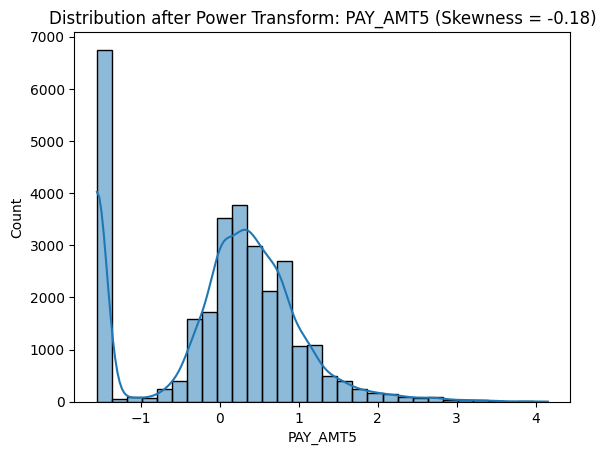

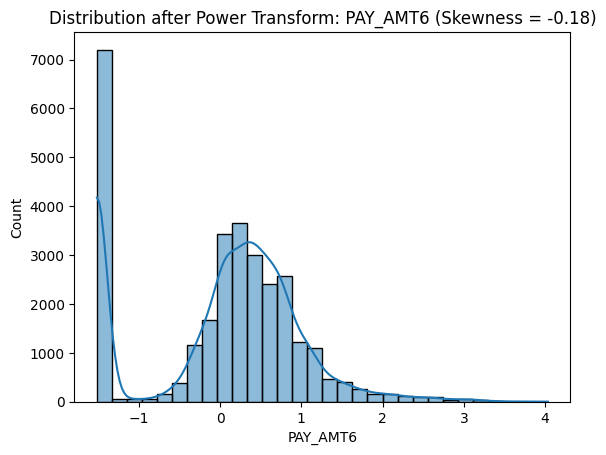

In [29]:
epsilon = 1e-6
log_cols = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4','BILL_AMT5', 'BILL_AMT6']
for col in log_cols:
    min_val = df[col].min()
    if min_val <= 0:
        shift = abs(min_val) + 1
        df[col] = np.log1p(df[col] + shift)
    else:
        df[col] = np.log1p(df[col])

numeric_cols = [col for col in num_cols if col not in ['ID','default.payment.next.month', 'SEX', 'EDUCATION', 'MARRIAGE']]
pt = PowerTransformer(method='yeo-johnson')  
df[numeric_cols] = pt.fit_transform(df[numeric_cols])
for col in numeric_cols:
    skew_val = df[col].skew()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution after Power Transform: {col} (Skewness = {skew_val:.2f})")
    plt.show()

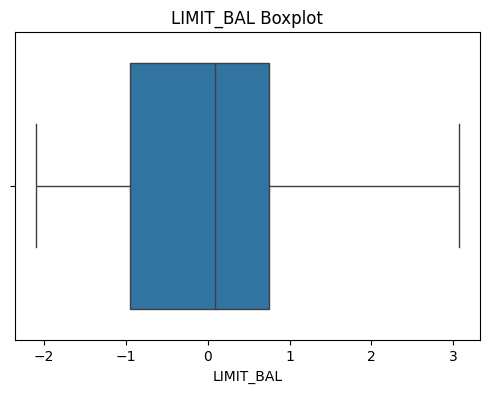

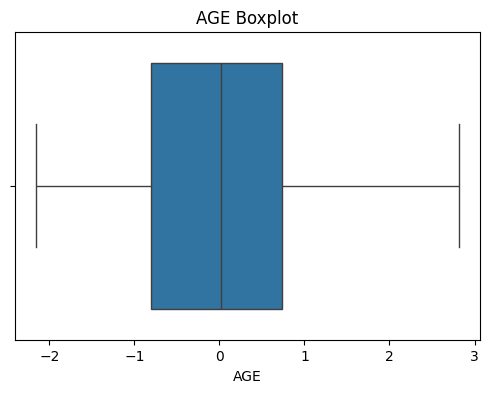

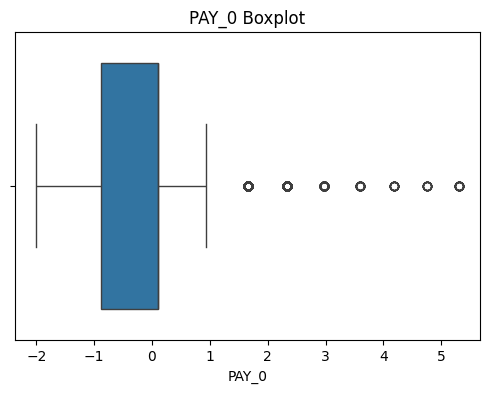

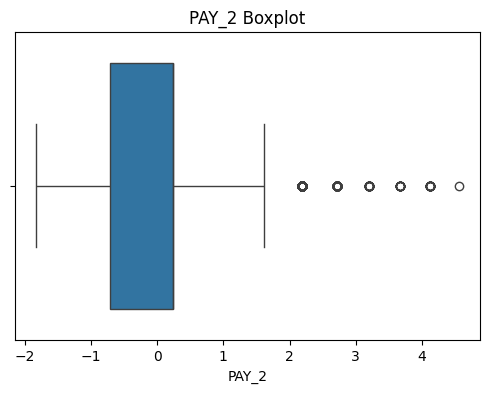

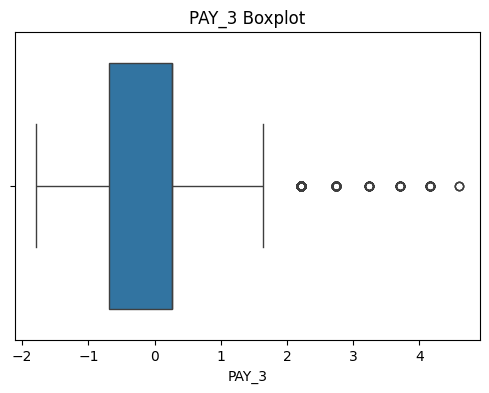

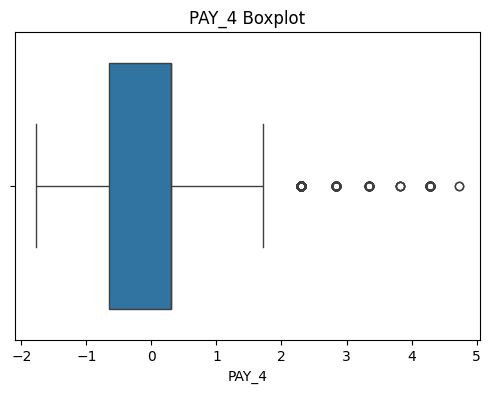

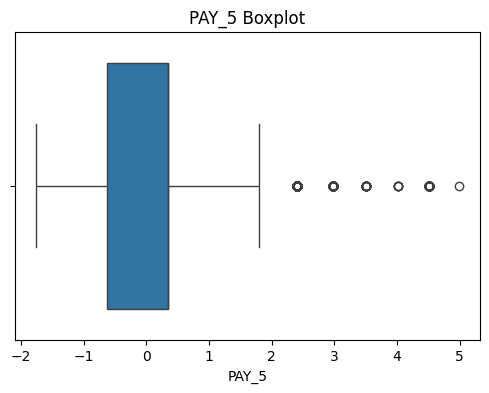

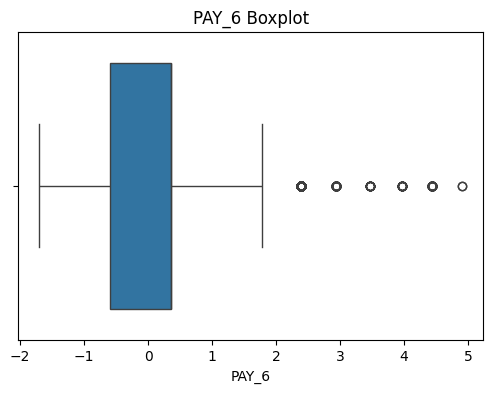

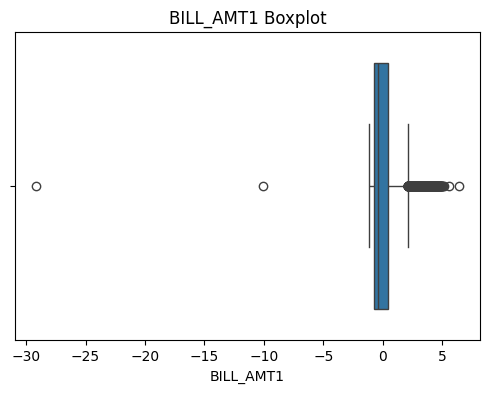

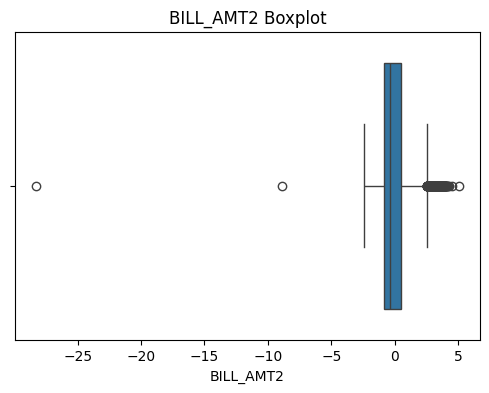

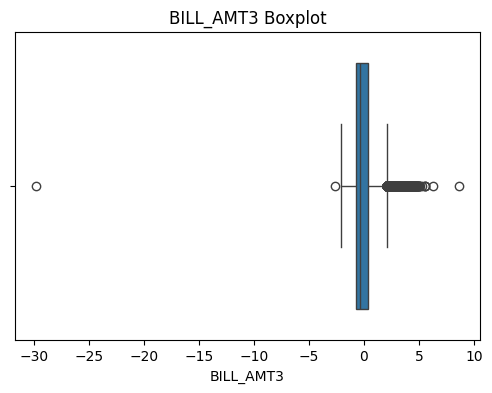

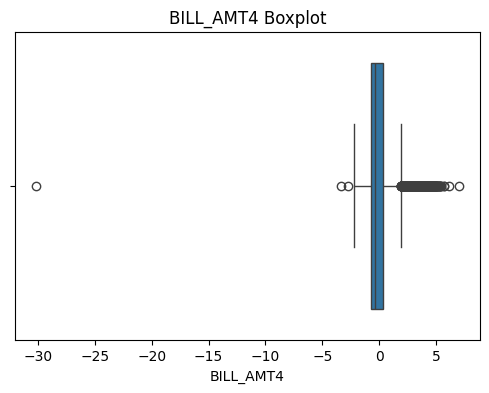

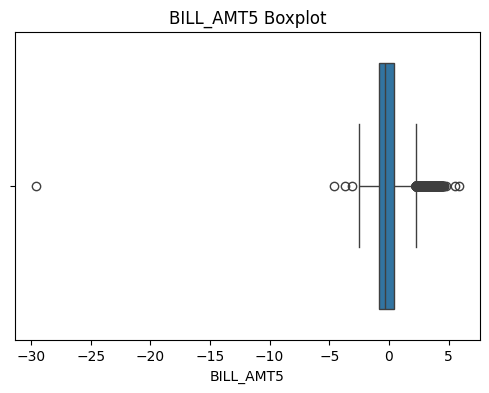

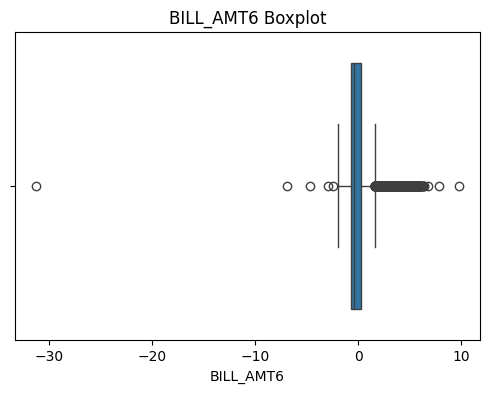

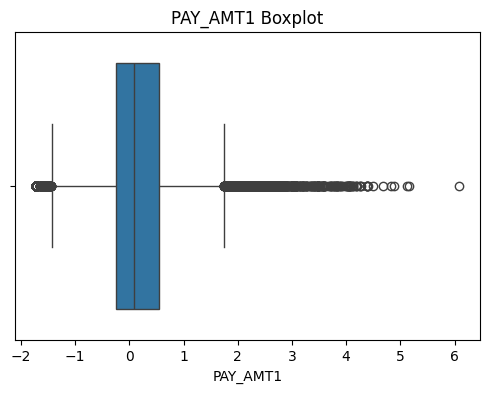

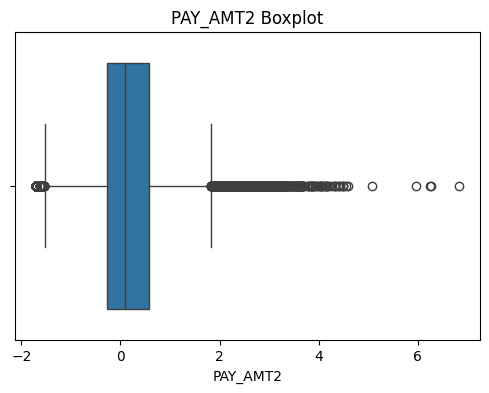

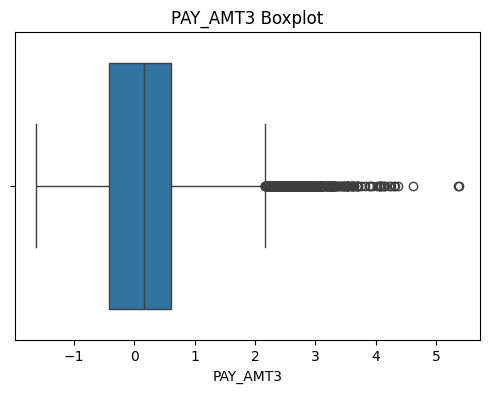

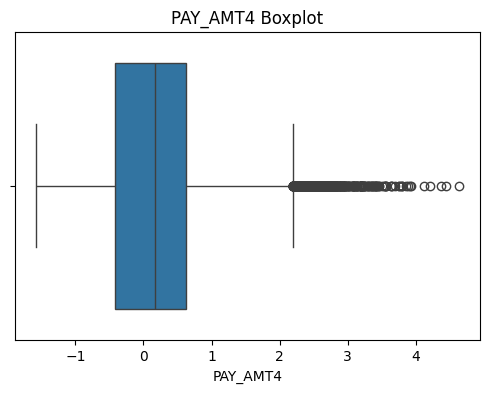

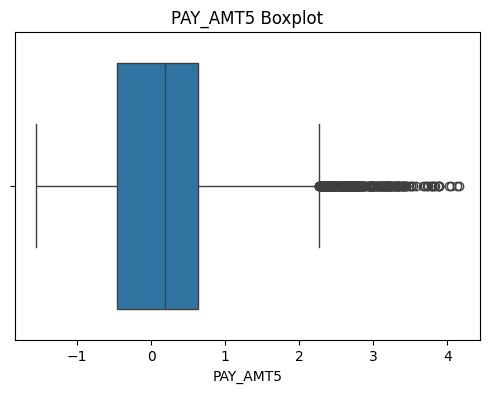

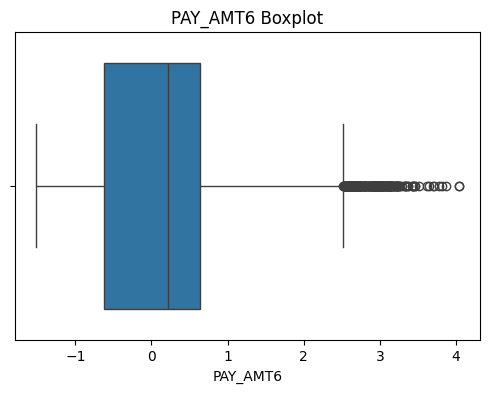

In [30]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()

In [31]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_cap) | (df[col] > upper_cap)]
    print(f"{col}: {len(outliers)} outliers before capping")
    df[col] = np.where(df[col] < lower_cap, lower_cap,np.where(df[col] > upper_cap, upper_cap, df[col]))

LIMIT_BAL: 0 outliers before capping
AGE: 0 outliers before capping
PAY_0: 3130 outliers before capping
PAY_2: 483 outliers before capping
PAY_3: 390 outliers before capping
PAY_4: 349 outliers before capping
PAY_5: 342 outliers before capping
PAY_6: 313 outliers before capping
BILL_AMT1: 1392 outliers before capping
BILL_AMT2: 634 outliers before capping
BILL_AMT3: 1557 outliers before capping
BILL_AMT4: 1792 outliers before capping
BILL_AMT5: 1207 outliers before capping
BILL_AMT6: 2305 outliers before capping
PAY_AMT1: 6300 outliers before capping
PAY_AMT2: 6230 outliers before capping
PAY_AMT3: 489 outliers before capping
PAY_AMT4: 444 outliers before capping
PAY_AMT5: 362 outliers before capping
PAY_AMT6: 261 outliers before capping


In [32]:
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [33]:
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

In [34]:
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
base_estimator = DecisionTreeClassifier(max_depth=2,random_state=42)
ada = AdaBoostClassifier(estimator=base_estimator,random_state=42)

In [41]:
param_grid = {
    'n_estimators': [100, 250, 500,1000],
    'learning_rate': [0.01, 0.05, 0.1]
}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=ada,param_grid=param_grid,cv=cv,n_jobs=-1,verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 250}


In [37]:
best_ada = grid_search.best_estimator_
best_ada.fit(X_train, y_train)
y_pred = best_ada.predict(X_test_scaled)
y_pred_prob = best_ada.predict_proba(X_test_scaled)[:, 1]
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8176666666666667


d:\AIWF\Task11(7.10.25)\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
d:\AIWF\Task11(7.10.25)\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [38]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Precision:",precision)
print("Recall:",recall)
print("F1-Score:",f1)
print("ROC-AUC:",roc_auc)


Precision: 0.667144906743185
Recall: 0.35041446872645066
F1-Score: 0.45948616600790515
ROC-AUC: 0.7587457876228155


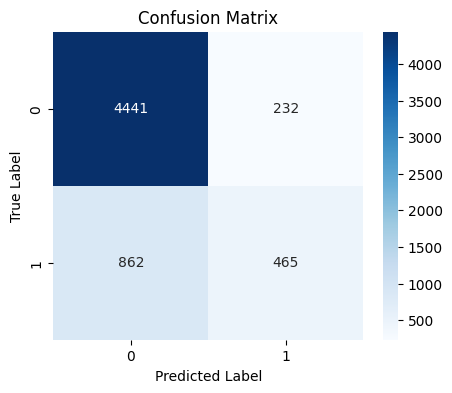

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

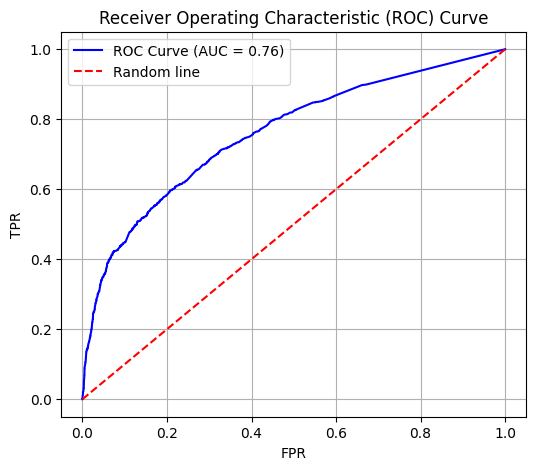

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label="Random line")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()